<a href="https://colab.research.google.com/github/imabari/ImabariScraping/blob/master/nagoya_pdfplumber_qiita.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget http://www.city.nagoya.jp/kenkofukushi/cmsfiles/contents/0000088/88972/kaitodeta1.pdf -O data.pdf

--2021-11-15 08:01:28--  http://www.city.nagoya.jp/kenkofukushi/cmsfiles/contents/0000088/88972/kaitodeta1.pdf
Resolving www.city.nagoya.jp (www.city.nagoya.jp)... 202.214.115.30
Connecting to www.city.nagoya.jp (www.city.nagoya.jp)|202.214.115.30|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.city.nagoya.jp/kenkofukushi/cmsfiles/contents/0000088/88972/kaitodeta1.pdf [following]
--2021-11-15 08:01:28--  https://www.city.nagoya.jp/kenkofukushi/cmsfiles/contents/0000088/88972/kaitodeta1.pdf
Connecting to www.city.nagoya.jp (www.city.nagoya.jp)|202.214.115.30|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1871921 (1.8M) [application/pdf]
Saving to: ‘data.pdf’

data.pdf            100%[===================>]   1.79M  8.36MB/s    in 0.2s    

2021-11-15 08:01:28 (8.36 MB/s) - ‘data.pdf’ saved [1871921/1871921]



In [2]:
!apt update

Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:4 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ Packages [73.0 kB]
Get:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [696 B]
Get:6 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Hit:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:8 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:9 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:10 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Get:12 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:13 https://developer.download.nvi

In [3]:
!pip install pdfplumber
!apt install libmagickwand-dev ghostscript

     |████████████████████████████████| 45 kB 1.4 MB/s 
     |████████████████████████████████| 5.6 MB 7.1 MB/s 
     |████████████████████████████████| 139 kB 55.7 MB/s 
     |████████████████████████████████| 1.9 MB 47.9 MB/s 
  Created wheel for pdfplumber: filename=pdfplumber-0.5.28-py3-none-any.whl size=32240 sha256=845c8be408b10697386d5dd7a3682f372ef2c76ab27d2af77ec1514620372c8f
  Stored in directory: /root/.cache/pip/wheels/f2/b1/a0/c0a77b756d580f53b3806ae0e0b3ec945a8d05fca1d6e10cc1
Successfully built pdfplumber
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  fonts-droid-fallback fonts-noto-mono gir1.2-freedesktop gir1.2-gdkpixbuf-2.0
  gir1.2-rsvg-2.0 gsfonts imagemagick-6-common libcairo-script-interpreter2
  libcairo2-dev libcupsfilters1 libcupsimage2 libdjvulibre-dev
  libdjvulibre-text libdjvulibre21 libgdk-pixbuf2.0-dev libgs9 libgs9-common
  libijs-0.35 libjbig2dec0 libl

In [4]:
%%writefile /etc/ImageMagick-6/policy.xml
<?xml version="1.0" encoding="UTF-8"?>
<!DOCTYPE policymap>

<policymap>

  <policy domain="resource" name="memory" value="256MiB"/>
  <policy domain="resource" name="map" value="512MiB"/>
  <policy domain="resource" name="width" value="16KP"/>
  <policy domain="resource" name="height" value="16KP"/>
  <policy domain="resource" name="area" value="128MB"/>
  <policy domain="resource" name="disk" value="1GiB"/>

  <policy domain="delegate" rights="none" pattern="URL"/>
  <policy domain="delegate" rights="none" pattern="HTTPS"/>
  <policy domain="delegate" rights="none" pattern="HTTP"/>

  <policy domain="path" rights="none" pattern="@*"/>
  <policy domain="cache" name="shared-secret" value="passphrase" stealth="true"/>

  <policy domain="coder" rights="none" pattern="PS"/>
  <policy domain="coder" rights="none" pattern="PS2"/>
  <policy domain="coder" rights="none" pattern="PS3"/>
  <policy domain="coder" rights="none" pattern="EPS"/>
  <policy domain="coder" rights="read|write" pattern="PDF" />
  <policy domain="coder" rights="none" pattern="XPS"/>
</policymap>

Overwriting /etc/ImageMagick-6/policy.xml


In [5]:
import pdfplumber
import pandas as pd

In [6]:
pdf = pdfplumber.open("data.pdf")

# １ページ

+ 縦：１ページ縦線の位置抽出
+ 横：１ページ横線の位置抽出

In [7]:
page0 = pdf.pages[0]

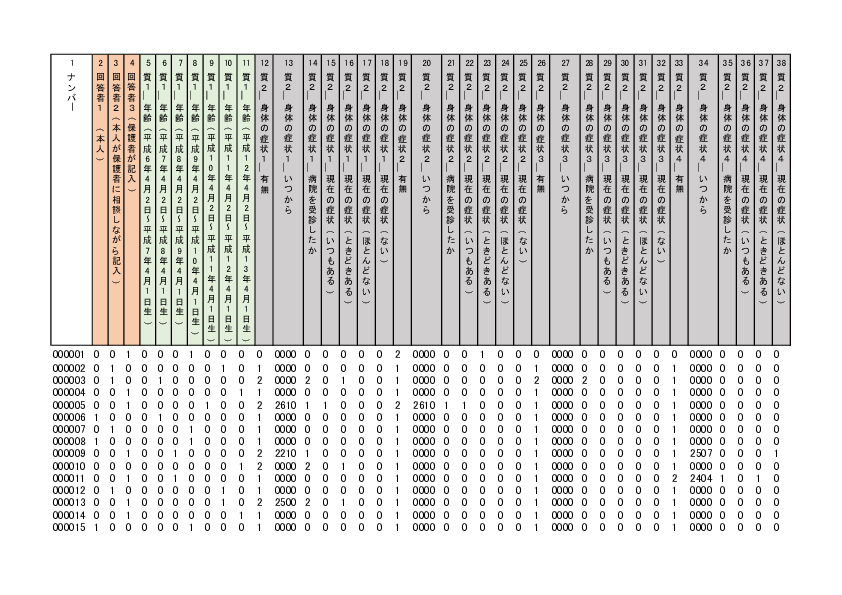

In [8]:
im0 = page0.to_image()
im0

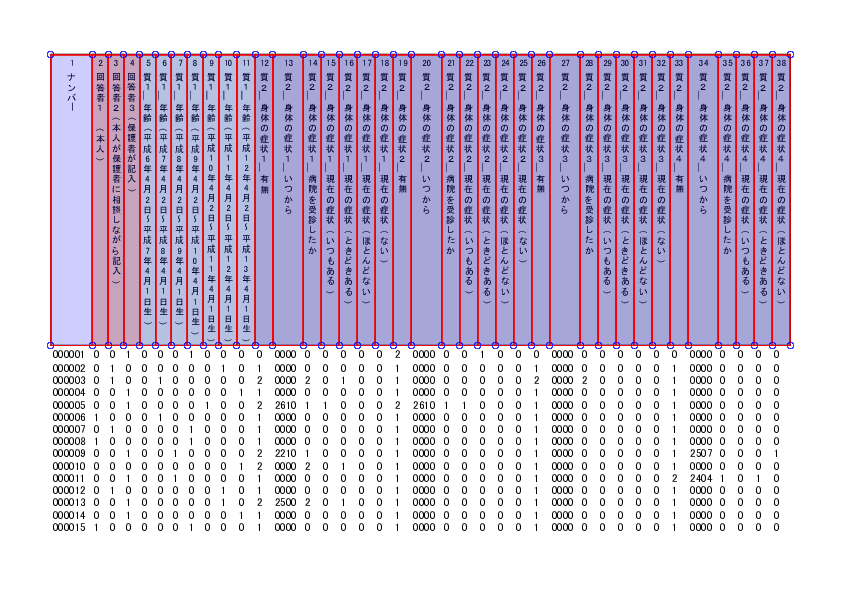

In [9]:
# テーブル確認

im0.reset().debug_tablefinder()

In [10]:
# データ確認

pd.DataFrame(page0.debug_tablefinder().edges)

,x0,y0,x1,y1,width,height,pts,linewidth,stroke,fill,evenodd,stroking_color,non_stroking_color,object_type,page_number,top,bottom,doctop,orientation
0,51.351,540.452,790.911,540.452,739.560,0,"[(51.351, 541.220), (790.911, 541.220), (790.9...",0,False,True,False,None,0,rect_edge,1,54.768,54.768,54.768,h
1,51.351,249.668,790.911,249.668,739.560,0,"[(51.351, 250.220), (790.911, 250.220), (790.9...",0,False,True,False,None,0,rect_edge,1,345.552,345.552,345.552,h
2,50.871,249.260,50.871,541.220,0,291.960,"[(50.391, 541.220), (51.351, 541.220), (51.351...",0,False,True,False,None,0,rect_edge,1,54.000,345.960,54.000,v
3,92.271,249.260,92.271,540.260,0,291.000,"[(92.271, 540.260), (139.911, 540.260), (139.9...",0,False,True,False,None,"[0.97255, 0.79608, 0.67843]",rect_edge,1,54.960,345.960,54.960,v
4,108.111,249.260,108.111,540.260,0,291.000,"[(107.631, 540.260), (108.591, 540.260), (108....",0,False,True,False,None,0,rect_edge,1,54.960,345.960,54.960,v
5,123.951,249.260,123.951,540.260,0,291.000,"[(123.471, 540.260), (124.431, 540.260), (124....",0,False,True,False,None,0,rect_edge,1,54.960,345.960,54.960,v
6,139.821,249.260,139.821,540.260,0,291.000,"[(92.271, 540.260), (139.911, 540.260), (139.9...",0,False,True,False,None,"[0.97255, 0.79608, 0.67843]",rect_edge,1,54.960,345.960,54.960,v
7,155.631,249.260,155.631,540.260,0,291.000,"[(155.151, 540.260), (156.111, 540.260), (156....",0,False,True,False,None,0,rect_edge,1,54.960,345.960,54.960,v
8,171.471,249.260,171.471,540.260,0,291.000,"[(170.991, 540.260), (171.951, 540.260), (171....",0,False,True,False,None,0,rect_edge,1,54.960,345.960,54.960,v
9,187.311,249.260,187.311,540.260,0,291.000,"[(186.831, 540.260), (187.791, 540.260), (187....",0,False,True,False,None,0,rect_edge,1,54.960,345.960,54.960,v


In [11]:
# 縦線抽出

vertical0 = [edge["x0"] for edge in page0.debug_tablefinder().edges if edge["orientation"] == "v"]

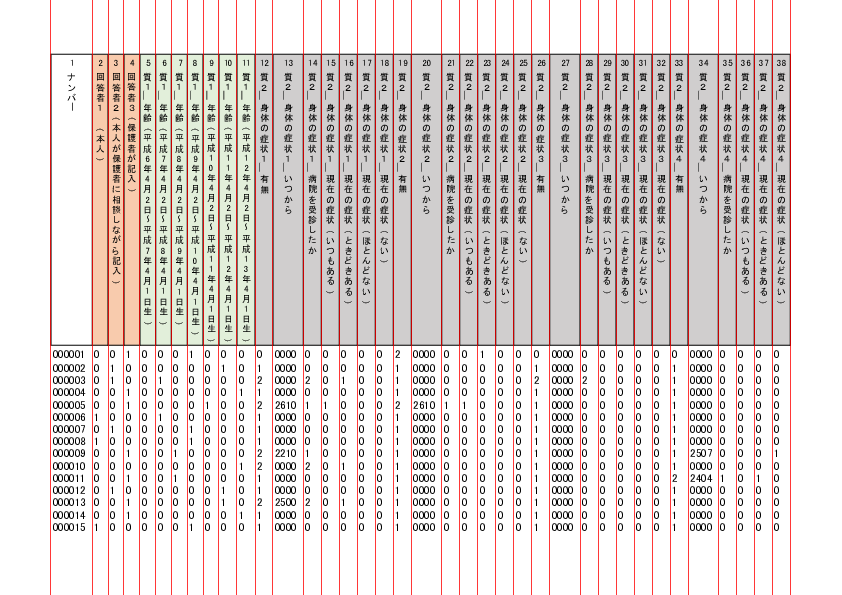

In [12]:
# 縦線確認

im0.reset().draw_vlines(vertical0)

In [13]:
# 表の下抽出

bottom = max([edge["bottom"] for edge in page0.debug_tablefinder().edges if edge["orientation"] == "h"])
bottom

Decimal('345.552')

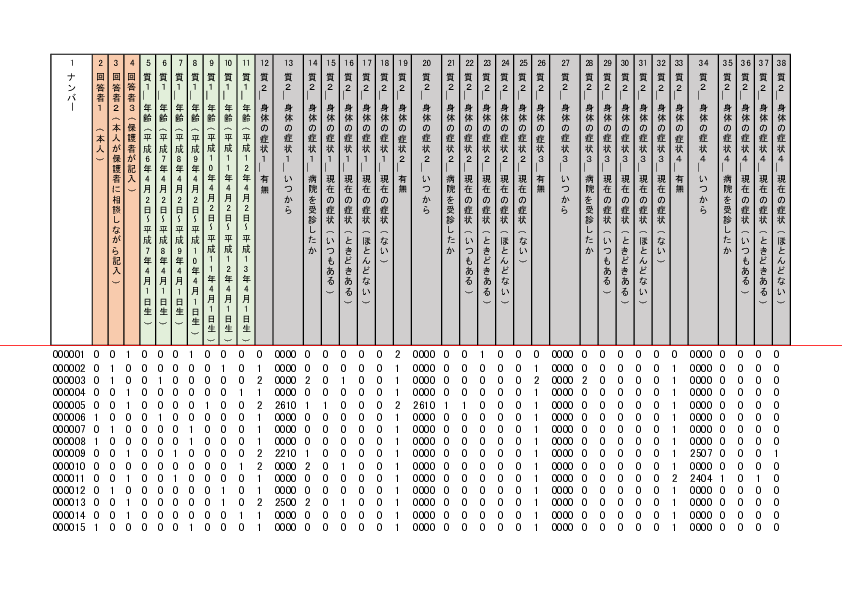

In [14]:
# 表の下確認

im0.reset().draw_hline(bottom)

In [15]:
# 下部のデータ切り抜き

crop0 = page0.within_bbox((0, bottom, page0.width, page0.height))

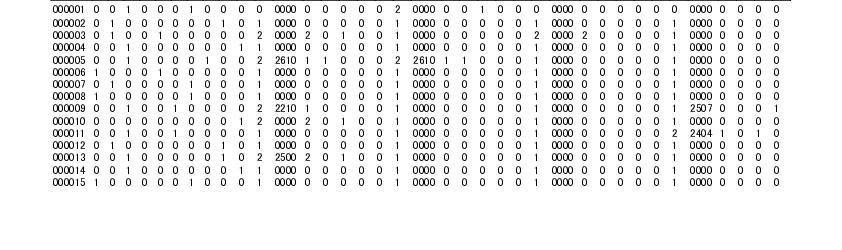

In [16]:
# 確認

im_crop0 = crop0.to_image()
im_crop0

In [17]:
# 表抽出設定（縦指定・横テキストベース）

table_settings0 = {
    "vertical_strategy": "explicit", 
    "horizontal_strategy": "text",
    "explicit_vertical_lines": vertical0,

    "snap_tolerance": 3,
    "intersection_tolerance": 15,
}

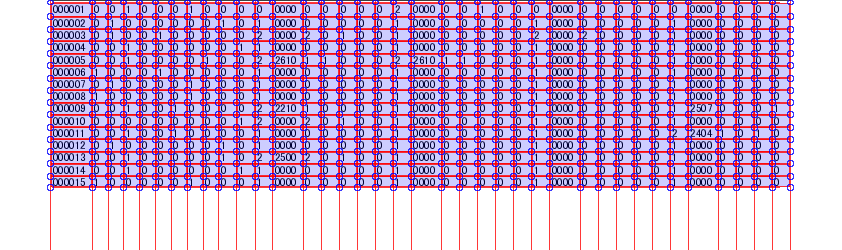

In [18]:
# テーブル確認

im_crop0.reset().debug_tablefinder(table_settings0)

In [19]:
pd.DataFrame(crop0.debug_tablefinder(table_settings0).edges)

,x0,x1,top,bottom,width,orientation,height
0,52.791,779.870,348.226,348.226,727.079,h,NaN
1,52.791,779.870,362.506,362.506,727.079,h,NaN
2,52.791,779.870,374.746,374.746,727.079,h,NaN
3,52.791,779.870,386.986,386.986,727.079,h,NaN
4,52.791,779.870,399.226,399.226,727.079,h,NaN
5,52.791,779.870,411.466,411.466,727.079,h,NaN
6,52.791,779.870,423.706,423.706,727.079,h,NaN
7,52.791,779.870,435.946,435.946,727.079,h,NaN
8,52.791,779.870,448.186,448.186,727.079,h,NaN
9,52.791,779.870,460.426,460.426,727.079,h,NaN


In [20]:
# 横線抽出

horizontal0 = [edge["top"] for edge in crop0.debug_tablefinder(table_settings0).edges if edge["orientation"] == "h"]

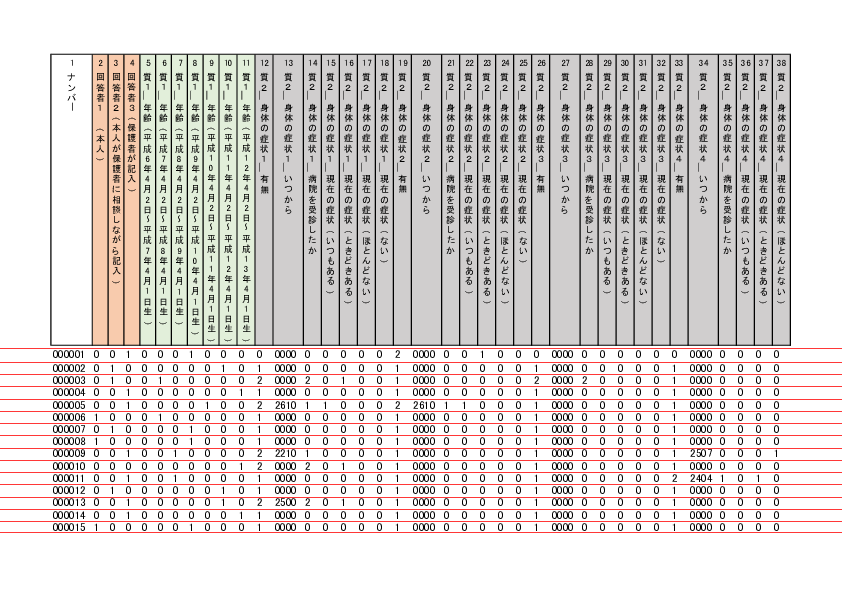

In [21]:
# 横線確認

im0.reset().draw_hlines(horizontal0)

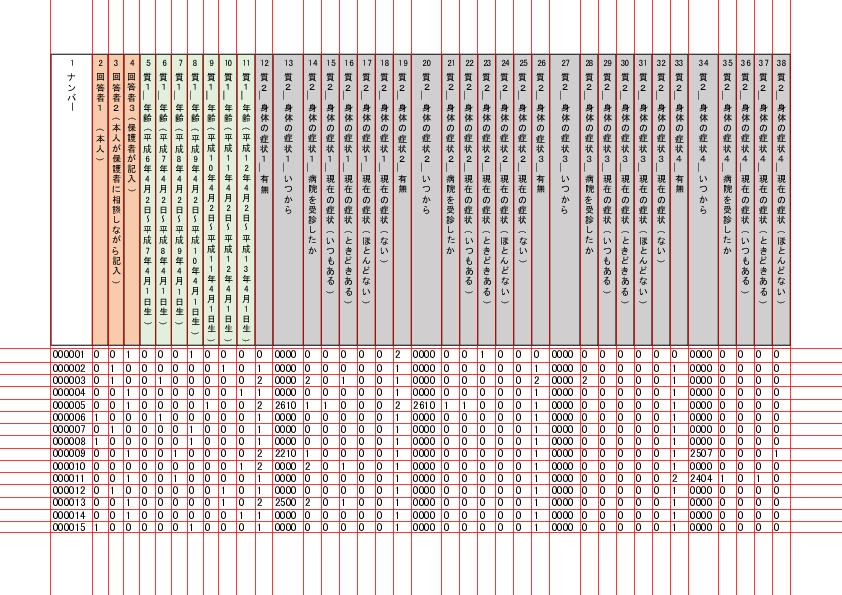

In [22]:
# 縦線確認

im0.draw_vlines(vertical0)

# ２ページ

+ 縦：１ページ縦線の位置再利用
+ 横：２ページ横線の位置抽出

In [23]:
page1 = pdf.pages[1]

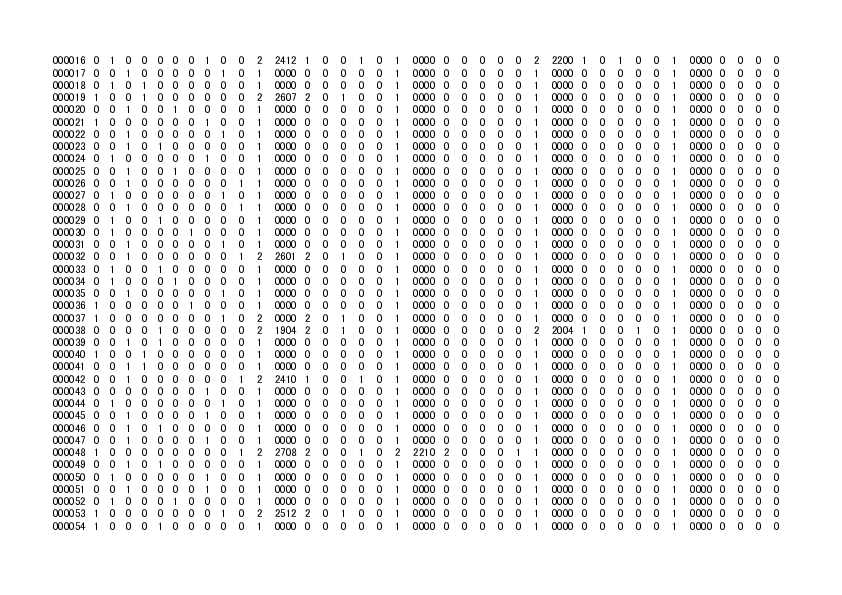

In [24]:
im1 = page1.to_image()
im1

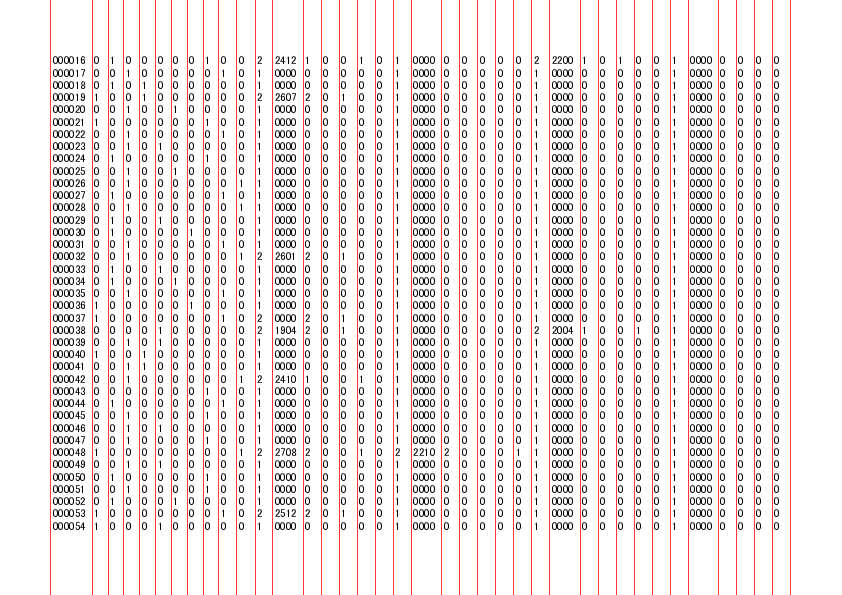

In [25]:
# 縦線確認（１ページ縦線）

im1.draw_vlines(vertical0)

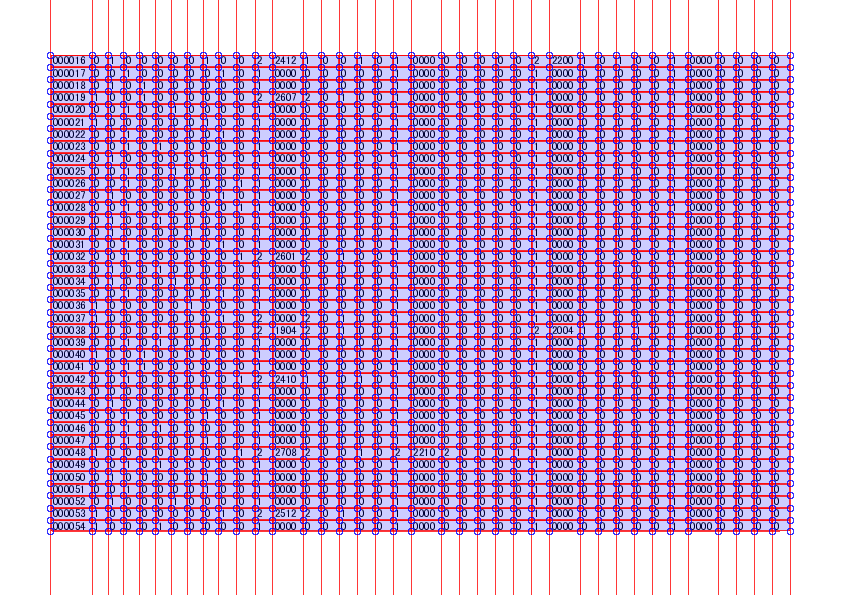

In [26]:
# テーブル確認

im1.reset().debug_tablefinder(table_settings0)

In [27]:
# 横線抽出

horizontal1 = [edge["top"] for edge in page1.debug_tablefinder(table_settings0).edges if edge["orientation"] == "h"]

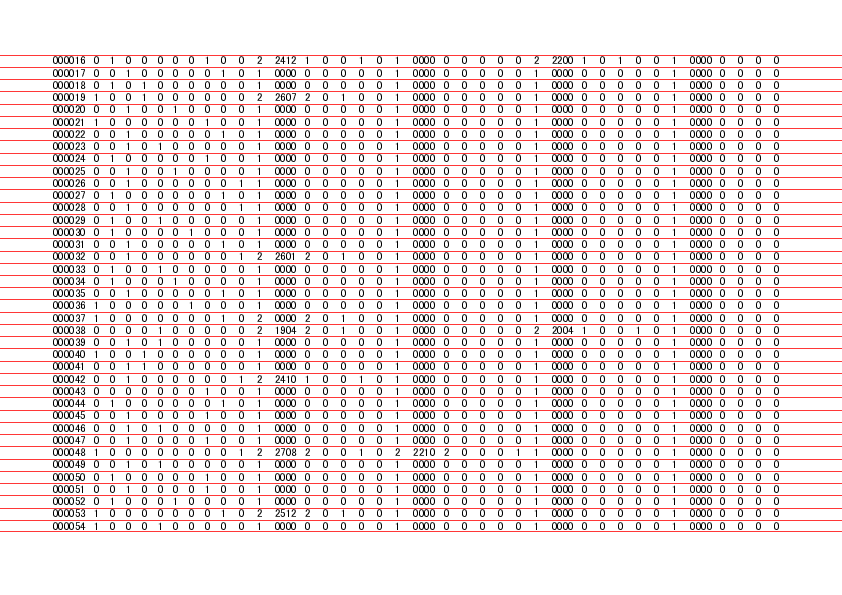

In [28]:
# 横線確認

im1.reset().draw_hlines(horizontal1)

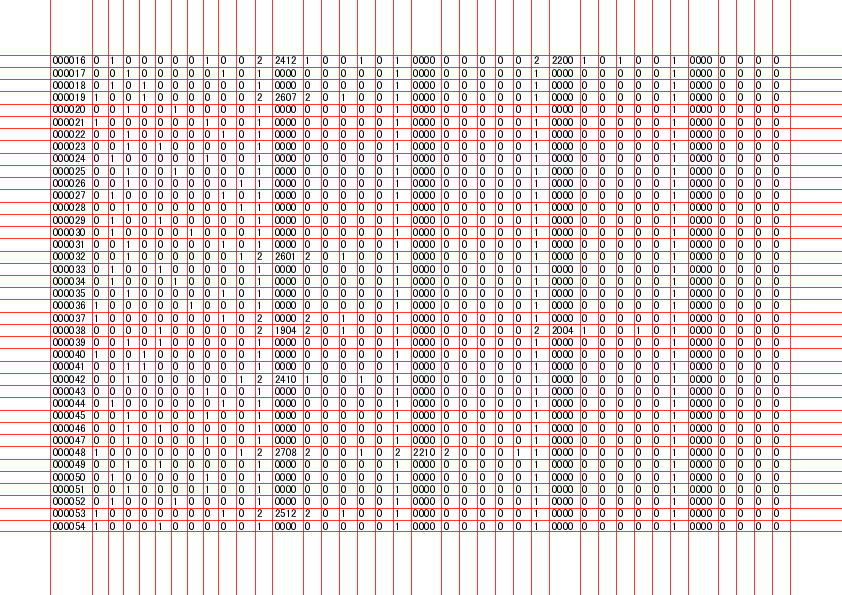

In [29]:
# 縦線確認（１ページ縦線と同じ）

im1.draw_vlines(vertical0)

In [30]:
# 表抽出設定（縦・横指定）

table_settings1 = {
    "vertical_strategy": "explicit", 
    "horizontal_strategy": "explicit",
    "explicit_vertical_lines": vertical0,
    "explicit_horizontal_lines": horizontal1,
    "snap_tolerance": 3,
    "intersection_tolerance": 15,
}

In [31]:
pd.DataFrame(page1.extract_table(table_settings1))

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37
0,000016,0,1,0,0,0,0,0,1,0,0,2,2412,1,0,0,1,0,1,0000,0,0,0,0,0,2,2200,1,0,1,0,0,1,0000,0,0,0,0
1,000017,0,0,1,0,0,0,0,0,1,0,1,0000,0,0,0,0,0,1,0000,0,0,0,0,0,1,0000,0,0,0,0,0,1,0000,0,0,0,0
2,000018,0,1,0,1,0,0,0,0,0,0,1,0000,0,0,0,0,0,1,0000,0,0,0,0,0,1,0000,0,0,0,0,0,1,0000,0,0,0,0
3,000019,1,0,0,1,0,0,0,0,0,0,2,2607,2,0,1,0,0,1,0000,0,0,0,0,0,1,0000,0,0,0,0,0,1,0000,0,0,0,0
4,000020,0,0,1,0,0,1,0,0,0,0,1,0000,0,0,0,0,0,1,0000,0,0,0,0,0,1,0000,0,0,0,0,0,1,0000,0,0,0,0
5,000021,1,0,0,0,0,0,0,1,0,0,1,0000,0,0,0,0,0,1,0000,0,0,0,0,0,1,0000,0,0,0,0,0,1,0000,0,0,0,0
6,000022,0,0,1,0,0,0,0,0,1,0,1,0000,0,0,0,0,0,1,0000,0,0,0,0,0,1,0000,0,0,0,0,0,1,0000,0,0,0,0
7,000023,0,0,1,0,1,0,0,0,0,0,1,0000,0,0,0,0,0,1,0000,0,0,0,0,0,1,0000,0,0,0,0,0,1,0000,0,0,0,0
8,000024,0,1,0,0,0,0,0,1,0,0,1,0000,0,0,0,0,0,1,0000,0,0,0,0,0,1,0000,0,0,0,0,0,1,0000,0,0,0,0
9,000025,0,0,1,0,0,1,0,0,0,0,1,0000,0,0,0,0,0,1,0000,0,0,0,0,0,1,0000,0,0,0,0,0,1,0000,0,0,0,0


# ３ページ

+ 縦：１ページ縦線の位置再利用
+ 横：２ページ横線の位置再利用

In [32]:
page2 = pdf.pages[2]

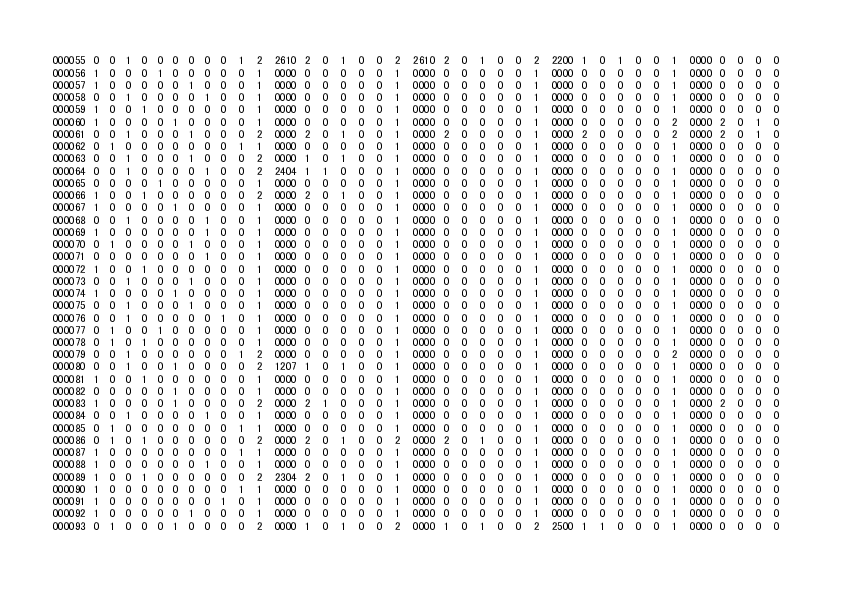

In [33]:
im2 = page2.to_image()
im2

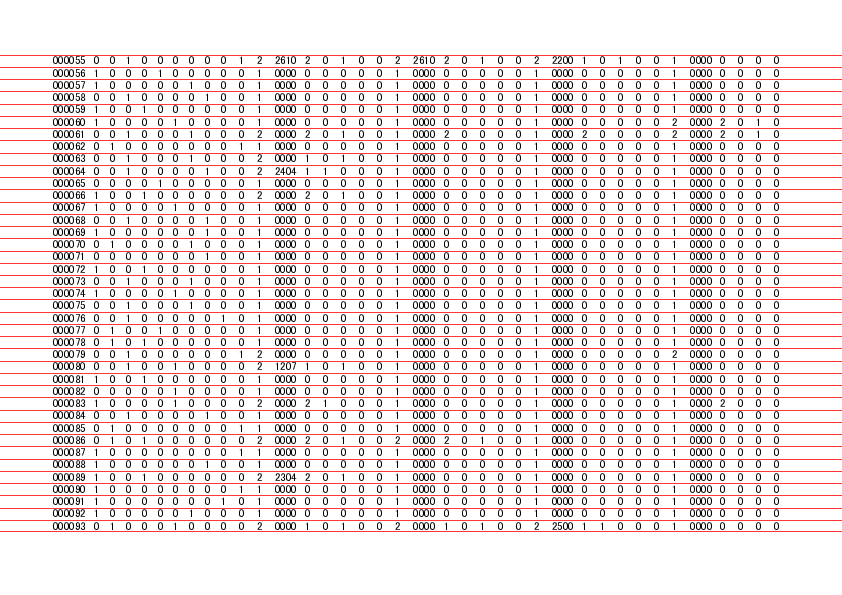

In [34]:
# 横線確認（２ページ横線と同じ）

im2.reset().draw_hlines(horizontal1)

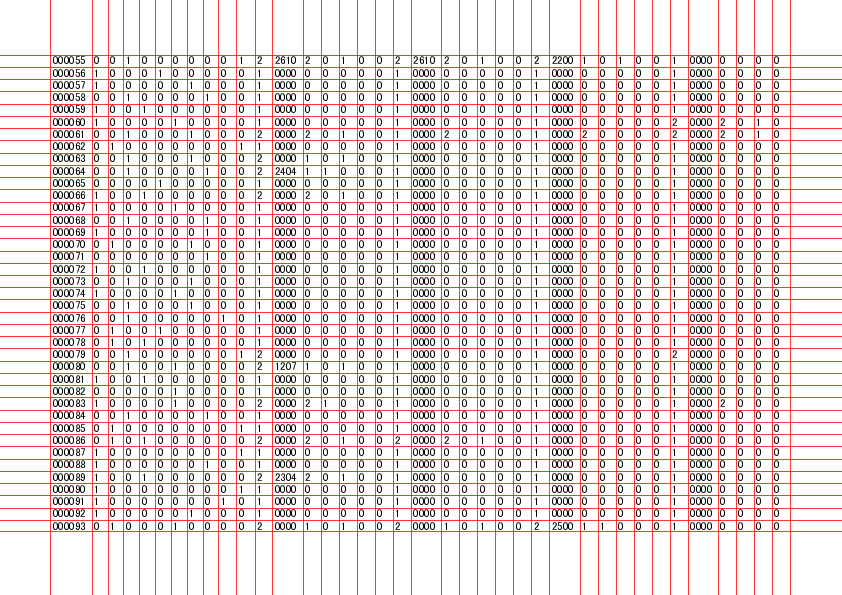

In [35]:
# 縦線確認（１ページ縦線と同じ）

im2.draw_vlines(vertical0)

In [36]:
pd.DataFrame(page2.extract_table(table_settings1))

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37
0,000055,0,0,1,0,0,0,0,0,0,1,2,2610,2,0,1,0,0,2,2610,2,0,1,0,0,2,2200,1,0,1,0,0,1,0000,0,0,0,0
1,000056,1,0,0,0,1,0,0,0,0,0,1,0000,0,0,0,0,0,1,0000,0,0,0,0,0,1,0000,0,0,0,0,0,1,0000,0,0,0,0
2,000057,1,0,0,0,0,0,1,0,0,0,1,0000,0,0,0,0,0,1,0000,0,0,0,0,0,1,0000,0,0,0,0,0,1,0000,0,0,0,0
3,000058,0,0,1,0,0,0,0,1,0,0,1,0000,0,0,0,0,0,1,0000,0,0,0,0,0,1,0000,0,0,0,0,0,1,0000,0,0,0,0
4,000059,1,0,0,1,0,0,0,0,0,0,1,0000,0,0,0,0,0,1,0000,0,0,0,0,0,1,0000,0,0,0,0,0,1,0000,0,0,0,0
5,000060,1,0,0,0,0,1,0,0,0,0,1,0000,0,0,0,0,0,1,0000,0,0,0,0,0,1,0000,0,0,0,0,0,2,0000,2,0,1,0
6,000061,0,0,1,0,0,0,1,0,0,0,2,0000,2,0,1,0,0,1,0000,2,0,0,0,0,1,0000,2,0,0,0,0,2,0000,2,0,1,0
7,000062,0,1,0,0,0,0,0,0,0,1,1,0000,0,0,0,0,0,1,0000,0,0,0,0,0,1,0000,0,0,0,0,0,1,0000,0,0,0,0
8,000063,0,0,1,0,0,0,1,0,0,0,2,0000,1,0,1,0,0,1,0000,0,0,0,0,0,1,0000,0,0,0,0,0,1,0000,0,0,0,0
9,000064,0,0,1,0,0,0,0,1,0,0,2,2404,1,1,0,0,0,1,0000,0,0,0,0,0,1,0000,0,0,0,0,0,1,0000,0,0,0,0


# 156ページ

+ 縦：156ページ縦線の位置抽出
+ 横：１ページ横線の位置再利用

In [37]:
page155 = pdf.pages[155]

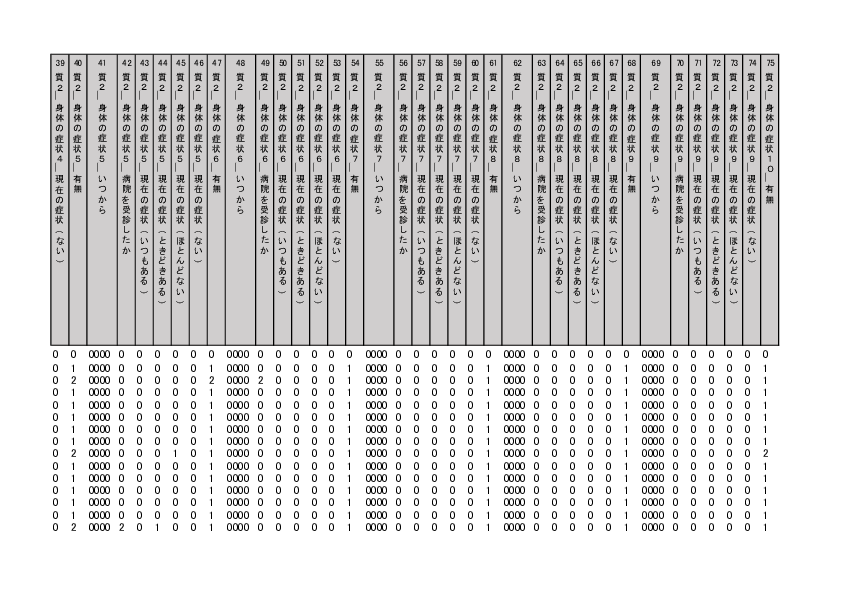

In [38]:
im155 = page155.to_image()
im155

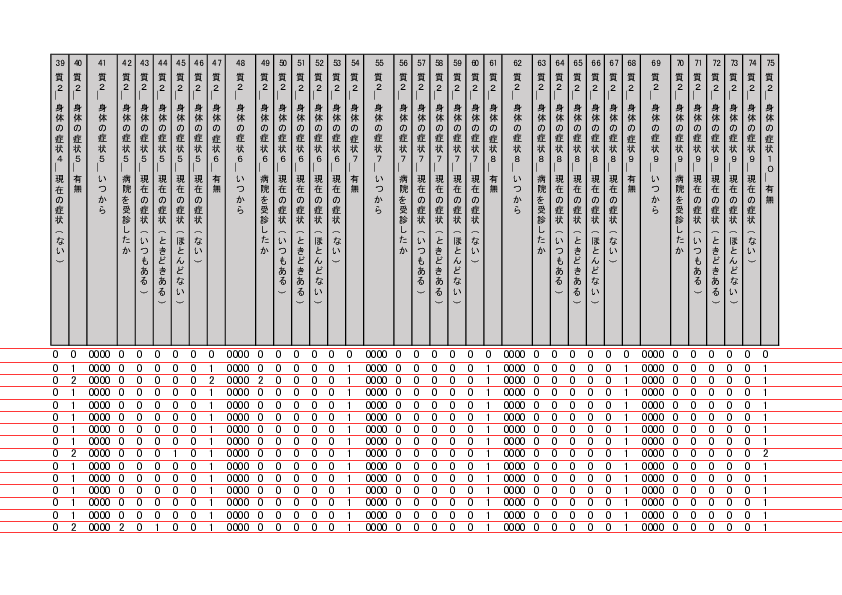

In [39]:
# 横線確認（１ページ横線）

im155.reset().draw_hlines(horizontal0)

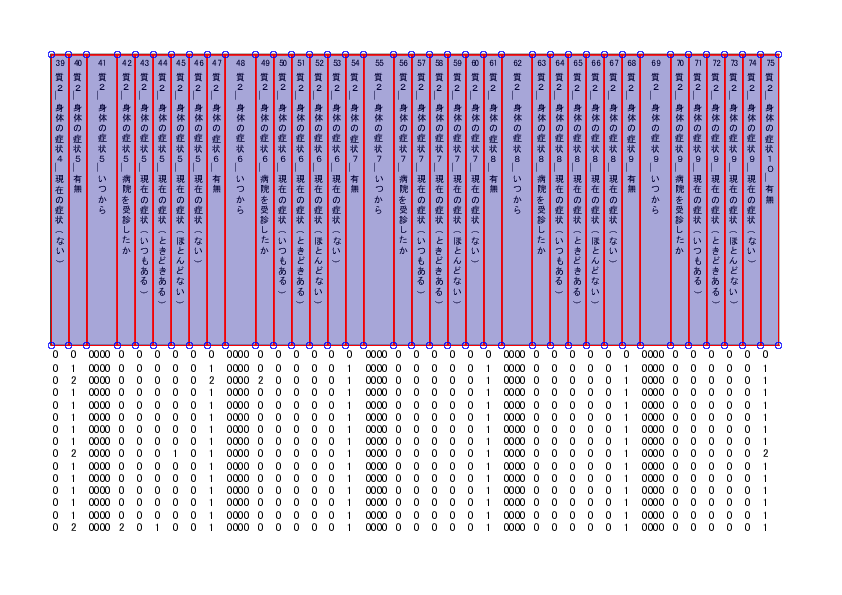

In [40]:
# テーブル確認

im155.reset().debug_tablefinder()

In [41]:
# 縦線抽出

vertical1 = [edge["x0"] for edge in page155.debug_tablefinder().edges if edge["orientation"] == "v"]

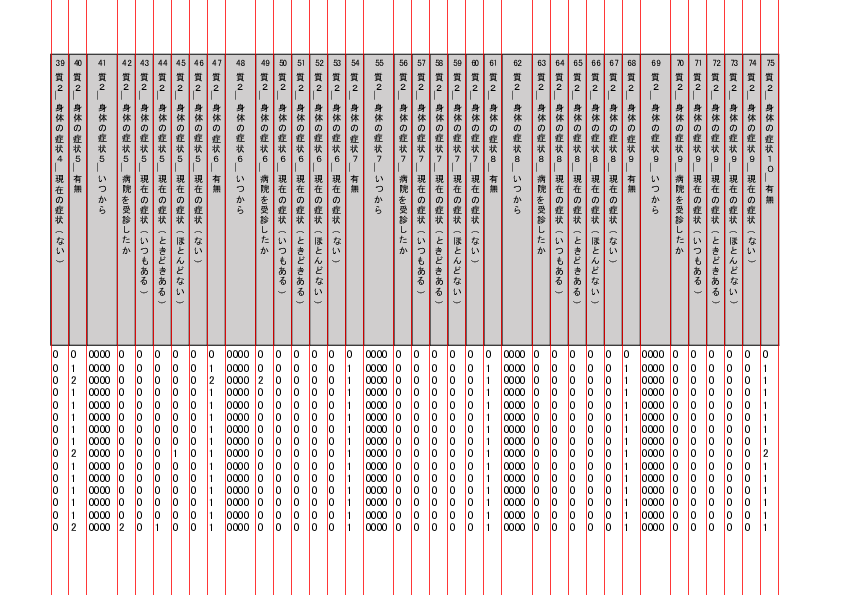

In [42]:
# 縦線確認

im155.reset().draw_vlines(vertical1)

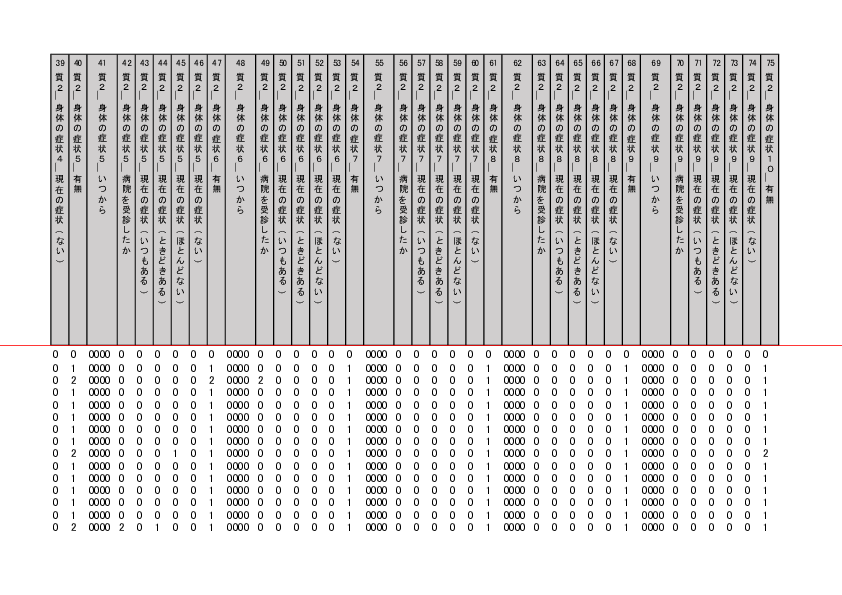

In [43]:
# 表の下確認

im155.reset().draw_hline(bottom)

In [44]:
# 下部のデータ切り抜き

crop155 = page155.within_bbox((0, bottom, page155.width, page155.height))

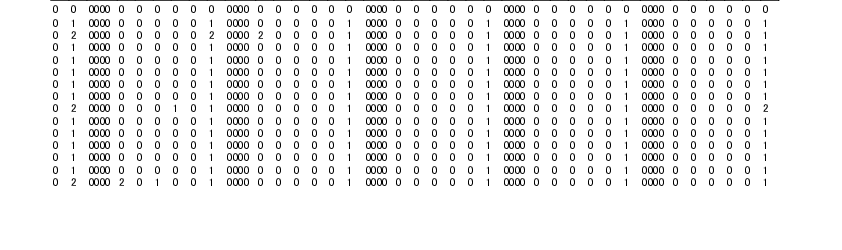

In [45]:
# 確認

im_crop155 = crop155.to_image()
im_crop155

In [46]:
# 表抽出設定（縦・横指定）

table_settings2 = {
    "vertical_strategy": "explicit", 
    "horizontal_strategy": "explicit",
    "explicit_vertical_lines": vertical1,
    "explicit_horizontal_lines": horizontal0,
    "snap_tolerance": 3,
    "intersection_tolerance": 15,
}

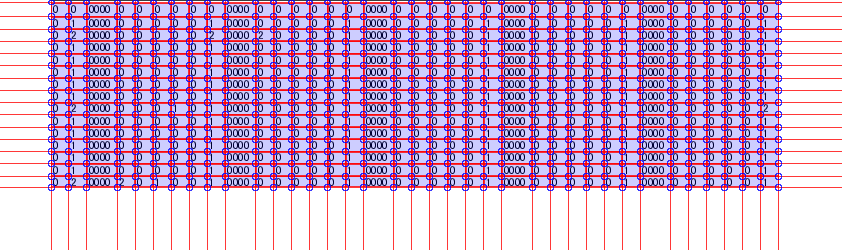

In [47]:
# テーブル確認

im_crop155.reset().debug_tablefinder(table_settings2)

In [48]:
pd.DataFrame(page155.extract_table(table_settings2))

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36
0,0,0,0000,0,0,0,0,0,0,0000,0,0,0,0,0,0,0000,0,0,0,0,0,0,0000,0,0,0,0,0,0,0000,0,0,0,0,0,0
1,0,1,0000,0,0,0,0,0,1,0000,0,0,0,0,0,1,0000,0,0,0,0,0,1,0000,0,0,0,0,0,1,0000,0,0,0,0,0,1
2,0,2,0000,0,0,0,0,0,2,0000,2,0,0,0,0,1,0000,0,0,0,0,0,1,0000,0,0,0,0,0,1,0000,0,0,0,0,0,1
3,0,1,0000,0,0,0,0,0,1,0000,0,0,0,0,0,1,0000,0,0,0,0,0,1,0000,0,0,0,0,0,1,0000,0,0,0,0,0,1
4,0,1,0000,0,0,0,0,0,1,0000,0,0,0,0,0,1,0000,0,0,0,0,0,1,0000,0,0,0,0,0,1,0000,0,0,0,0,0,1
5,0,1,0000,0,0,0,0,0,1,0000,0,0,0,0,0,1,0000,0,0,0,0,0,1,0000,0,0,0,0,0,1,0000,0,0,0,0,0,1
6,0,1,0000,0,0,0,0,0,1,0000,0,0,0,0,0,1,0000,0,0,0,0,0,1,0000,0,0,0,0,0,1,0000,0,0,0,0,0,1
7,0,1,0000,0,0,0,0,0,1,0000,0,0,0,0,0,1,0000,0,0,0,0,0,1,0000,0,0,0,0,0,1,0000,0,0,0,0,0,1
8,0,2,0000,0,0,0,1,0,1,0000,0,0,0,0,0,1,0000,0,0,0,0,0,1,0000,0,0,0,0,0,1,0000,0,0,0,0,0,2
9,0,1,0000,0,0,0,0,0,1,0000,0,0,0,0,0,1,0000,0,0,0,0,0,1,0000,0,0,0,0,0,1,0000,0,0,0,0,0,1


# 157ページ

+ 縦：156ページ縦線の位置再利用
+ 横：２ページ横線の位置再利用

In [49]:
page156 = pdf.pages[156]

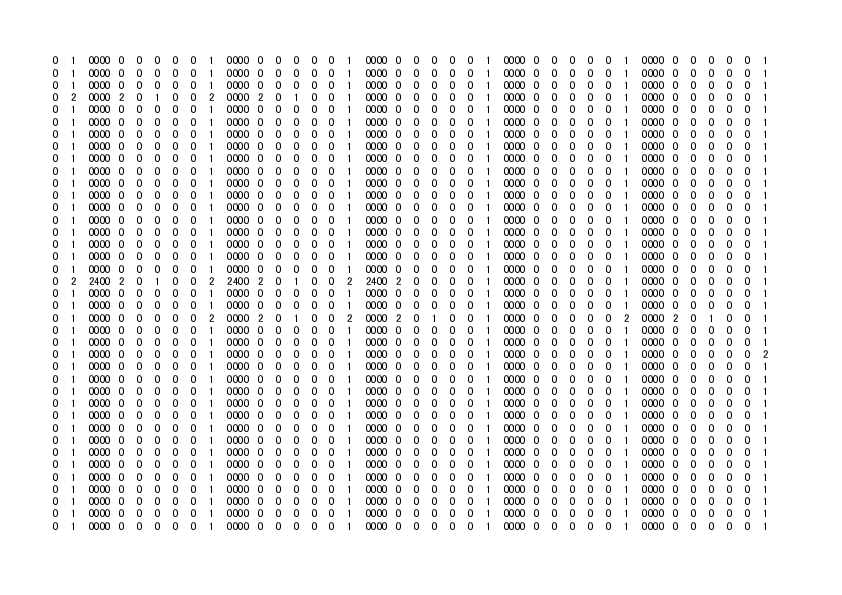

In [50]:
im156 = page156.to_image()
im156

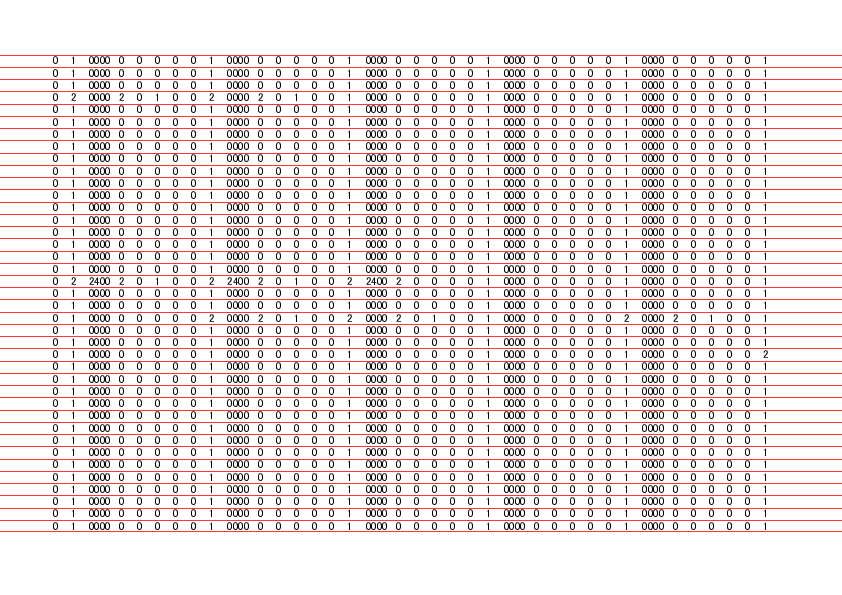

In [51]:
# 横線確認（２ページ横線）

im156.reset().draw_hlines(horizontal1)

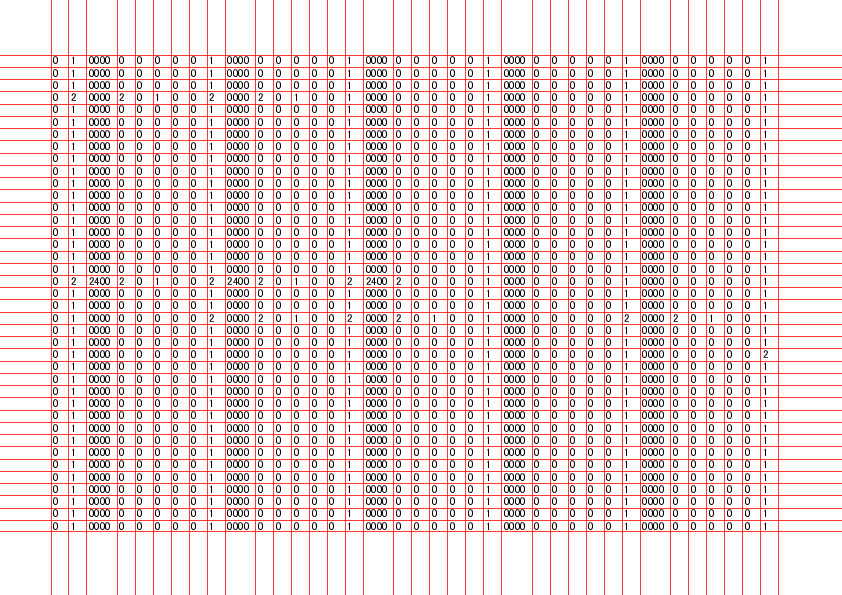

In [52]:
# 縦線確認（156ページ縦線）

im156.draw_vlines(vertical1)

In [53]:
# 表抽出設定（縦・横指定）

table_settings3 = {
    "vertical_strategy": "explicit", 
    "horizontal_strategy": "explicit",
    "explicit_vertical_lines": vertical1,
    "explicit_horizontal_lines": horizontal1,
    "snap_tolerance": 3,
    "intersection_tolerance": 15,
}

In [54]:
pd.DataFrame(page156.extract_table(table_settings3))

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36
0,0,1,0000,0,0,0,0,0,1,0000,0,0,0,0,0,1,0000,0,0,0,0,0,1,0000,0,0,0,0,0,1,0000,0,0,0,0,0,1
1,0,1,0000,0,0,0,0,0,1,0000,0,0,0,0,0,1,0000,0,0,0,0,0,1,0000,0,0,0,0,0,1,0000,0,0,0,0,0,1
2,0,1,0000,0,0,0,0,0,1,0000,0,0,0,0,0,1,0000,0,0,0,0,0,1,0000,0,0,0,0,0,1,0000,0,0,0,0,0,1
3,0,2,0000,2,0,1,0,0,2,0000,2,0,1,0,0,1,0000,0,0,0,0,0,1,0000,0,0,0,0,0,1,0000,0,0,0,0,0,1
4,0,1,0000,0,0,0,0,0,1,0000,0,0,0,0,0,1,0000,0,0,0,0,0,1,0000,0,0,0,0,0,1,0000,0,0,0,0,0,1
5,0,1,0000,0,0,0,0,0,1,0000,0,0,0,0,0,1,0000,0,0,0,0,0,1,0000,0,0,0,0,0,1,0000,0,0,0,0,0,1
6,0,1,0000,0,0,0,0,0,1,0000,0,0,0,0,0,1,0000,0,0,0,0,0,1,0000,0,0,0,0,0,1,0000,0,0,0,0,0,1
7,0,1,0000,0,0,0,0,0,1,0000,0,0,0,0,0,1,0000,0,0,0,0,0,1,0000,0,0,0,0,0,1,0000,0,0,0,0,0,1
8,0,1,0000,0,0,0,0,0,1,0000,0,0,0,0,0,1,0000,0,0,0,0,0,1,0000,0,0,0,0,0,1,0000,0,0,0,0,0,1
9,0,1,0000,0,0,0,0,0,1,0000,0,0,0,0,0,1,0000,0,0,0,0,0,1,0000,0,0,0,0,0,1,0000,0,0,0,0,0,1
